<a href="https://colab.research.google.com/github/daizybhadresha/ga-learner-dsmp-repo/blob/master/EDA_%26_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  


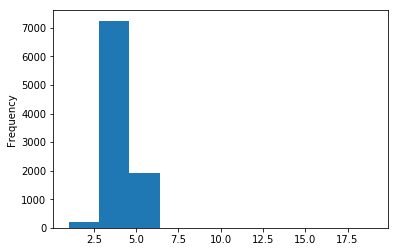

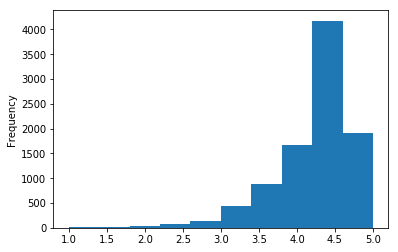

Average of the ratings : 4.191757420456978
                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.042708
Android Ver         2  0.021354
                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


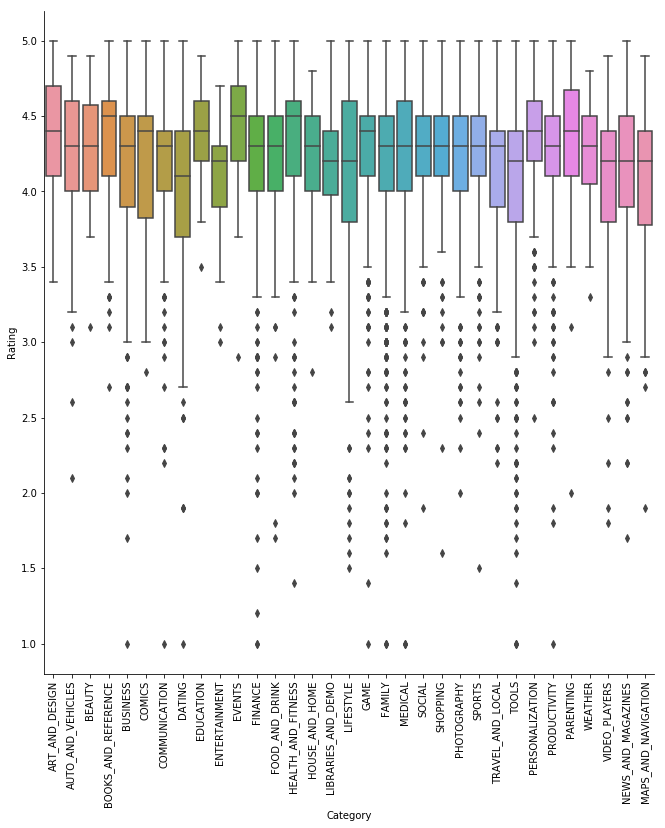

In [ ]:
### EDA Project 1
# Removed invalid data - which is incorrect Ex Rating > 5 is invalid
# Checked null values since nof of rows were around 0.02% we removed those rows
# We checked Category vs Rating -> Ratings for all the categories are almost similar. Hence there is no speciality
# Checked Installs vs Rating  -> Some +ve correlation found btw Installs & Ratings

#Importing header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/My Drive/Colab Notebooks/EDA Project - Play Store.csv'

data = pd.read_csv(path)
pd.set_option('max_columns', 13)
print(data.head(2))

# Observation on ratings - Found that Ratings > 5, which is invalid
data['Rating'].plot(kind='hist')
plt.show()

# Cleaning data whose rating > 5
data = data[data['Rating']<=5.0]
data['Rating'].plot(kind='hist')
plt.show()

# Average rating of application in store is around 4 which is very high
print('Average of the ratings :', data['Rating'].mean())

# Null Value Treatment

# Exploration of Null values
total_null = data.isnull().sum()
percent_null = (total_null/len(data)) * 100
missing_data = pd.concat([total_null, percent_null],  axis=1, keys=['Total','Percent'])
print(missing_data)

# Cleaning Null Value Rows
data = data.dropna()
total_null_1 = data.isnull().sum()
percent_null_1 = (total_null_1/len(data)) * 100
missing_data_1 = pd.concat([total_null_1, percent_null_1],  axis=1, keys=['Total','Percent'])
print(missing_data_1)

# Category vs Rating
cp = sns.catplot(x="Category", y="Rating", data=data, kind="box", height = 10)
cp.set_xticklabels(rotation=90)
cp.set_titles('Rating vs Category [BoxPlot]')

plt.show()


[ 8 11 13 ...  4  6 14]


Text(0.5, 1.0, 'Rating vs Installs[RegPlot]')

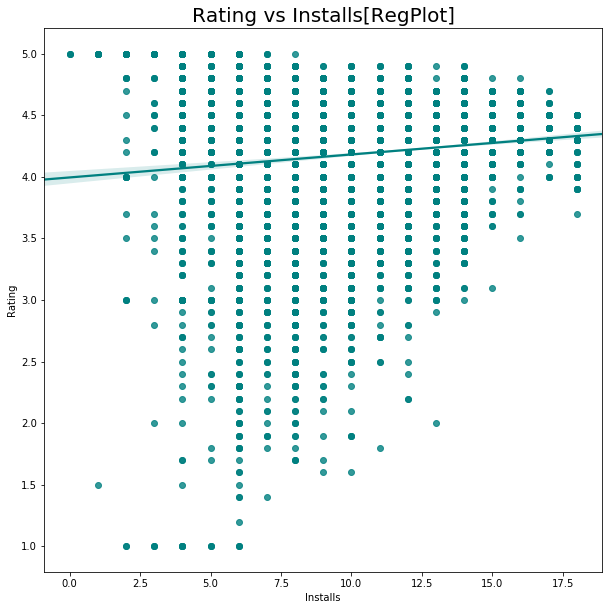

In [ ]:
#Importing header files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import re

# Installs vs Ratings

#Removing `,` &  '+'  from the column
data['Installs']=data['Installs'].str.replace(',','')
data['Installs']=data['Installs'].str.replace('+','')

#Converting the column to `int` datatype
data['Installs'] = data['Installs'].astype(int)

#Label encoding the column to reduce the effect of a large range of values
le=LabelEncoder()
data['Installs']=le.fit_transform(data['Installs'])
print(le.fit_transform(data['Installs']))

#Plotting Regression plot between Rating and Installs
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data)
plt.title('Rating vs Installs[RegPlot]',size = 20)



In [ ]:
print(data['Installs'].value_counts())

#print(data['Installs'].cat.codes)
print(data['Installs'].unique())

12    1576
14    1252
10    1150
8     1009
13     752
6      712
11     537
9      466
7      431
16     409
4      309
15     289
5      201
17      72
2       69
18      58
3       56
1        9
0        3
Name: Installs, dtype: int64
[ 8 11 13 15 10  9 12 14  7 16 18  6 17  4  5  2  1  3  0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


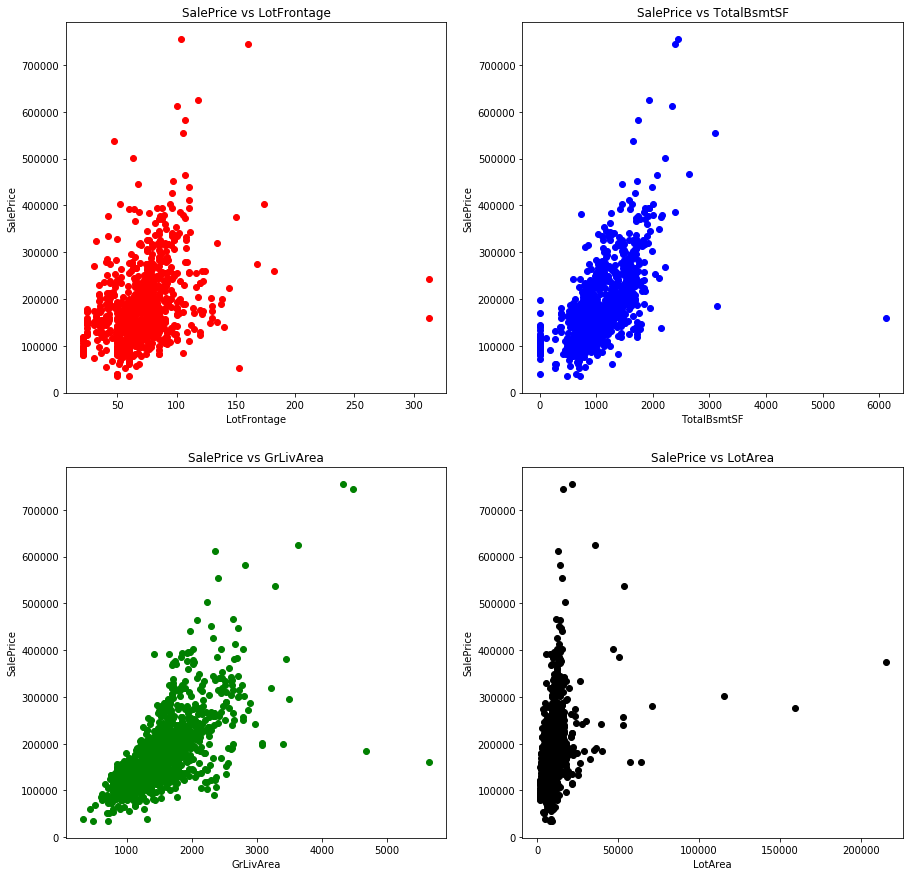

['PoolQC']
0.0


In [ ]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

path='/content/drive/My Drive/Colab Notebooks/Saleprice- EDA & Data Preprocessing.csv'

# Task 1 - Split into training and test datasets
df = pd.read_csv(path)
X = df.iloc[:,0:7]
y = df.iloc[:,7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#print(X_train)
#print(X_test)

# Task 2 - Detect Outlier - Scatterplot

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2,2, figsize=(15,15))
ax_1.scatter(X_train['LotFrontage'], y_train, color='red')
ax_1.set_title('SalePrice vs LotFrontage')
ax_1.set_xlabel('LotFrontage')
ax_1.set_ylabel('SalePrice')

ax_2.scatter(X_train['TotalBsmtSF'], y_train, color='blue')
ax_2.set_xlabel('TotalBsmtSF')
ax_2.set_ylabel('SalePrice')
ax_2.set_title('SalePrice vs TotalBsmtSF')

ax_3.scatter(X_train['GrLivArea'], y_train, color='green')
ax_3.set_xlabel('GrLivArea')
ax_3.set_ylabel('SalePrice')
ax_3.set_title('SalePrice vs GrLivArea')

ax_4.scatter(X_train['LotArea'], y_train, color='black')
ax_4.set_xlabel('LotArea')
ax_4.set_ylabel('SalePrice')
ax_4.set_title('SalePrice vs LotArea')

plt.show()


# Task 3 - Treatment of outliers -  Out LIARS!
train = pd.concat([X_train, y_train], axis=1)

mask1 = train['LotFrontage']<300
mask2 = train['TotalBsmtSF']<5000
mask3 = train['GrLivArea']<4500
mask4 = train['LotArea']<100000

train = train[ mask1 & mask2 & mask3 & mask4 ]


#Task 4 - Identify percentage of missing values
# Detecting missing data

# Split into feature and target
X_train, y_train = train.iloc[:,:7], train[['SalePrice']]

# percentage of missing values for every feature
missing_columns = (X_train.isnull().sum()*100) / len(X_train)
mask = missing_columns > 50
columns = missing_columns[mask].index.tolist()
print(columns)


# percentage of rows with more than 5 missing values
rows_percentage = (1 - (len(X_train.dropna(thresh=5)) / len(X_train)))*100      # thresh - Require that many non-NA values.
print(rows_percentage)




In [ ]:
## Handling missing data

# Import packages
from sklearn.preprocessing import Imputer
dict_new = {'Attchd':0,'Detchd':1,'BuiltIn':2,'2Types':3,'CarPort':4,'Basment':5}
X_train['GarageType'] = X_train['GarageType'].map(dict_new)
X_test['GarageType'] = X_test['GarageType'].map(dict_new)

# Custom imputers
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

# Drop PoolQC
X_train = X_train.drop(columns=['PoolQC'], axis=1)
X_test = X_test.drop(columns=['PoolQC'], axis=1)

# Train the imputer
mode_imputer = mode_imputer.fit(X_train[['GarageType']])
mean_imputer = mean_imputer.fit(X_train[['LotFrontage']])

# Apply the imputer 
X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])
X_test['GarageType'] = mode_imputer.transform(X_test[['GarageType']])
X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])
X_test['LotFrontage'] = mean_imputer.transform(X_test[['LotFrontage']])



In [ ]:
print(X_train.info)

<bound method DataFrame.info of       LotFrontage PoolQC  TotalBsmtSF  ...  LotArea  SaleCondition GarageType
455          80.0    NaN         1242  ...     9600         Normal     Attchd
863          70.0    NaN         1148  ...     7931         Normal     Attchd
504          24.0    NaN          855  ...     2308         Normal     Attchd
1413         88.0    NaN         1844  ...    10994        Abnorml     Attchd
1389         60.0    NaN          735  ...     6000         Normal     Detchd
1091         24.0    NaN          600  ...     2160         Normal     Detchd
590          64.0    NaN          770  ...     8320         Normal     Attchd
1255         52.0    NaN          884  ...     6240         Normal     Detchd
1202         50.0    NaN          884  ...     6000         Normal     Detchd
573          76.0    NaN          384  ...     9967         Normal    BuiltIn
453          75.0    NaN          768  ...     9000         Normal     Attchd
127          55.0    NaN        

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
